With this tutorial, I present how to build a fashion product recognizer using Convolution Neural Network.

Link: https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

**It shares the same image size and structure of training and testing splits.** So the below guide remains same as in case of *MNIST-CNN-Keras* tutorial. Do not the dataset loaded here is fashion_mnist instead of mnist.

Dataset is loaded below. It has images and label for each image. The whole of dataset is divided into training and testing data.

In [1]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Above, we obeserve that in total of 70K images, 60K are used for training and 10K will be used for training.
Also, each image has dimension 28 x 28 (represented by the X_train and X_test). Y_train and Y_test are vectors of size 60K and 10K i.e. each image has a corresponding value here.

Lets see how the data looks like

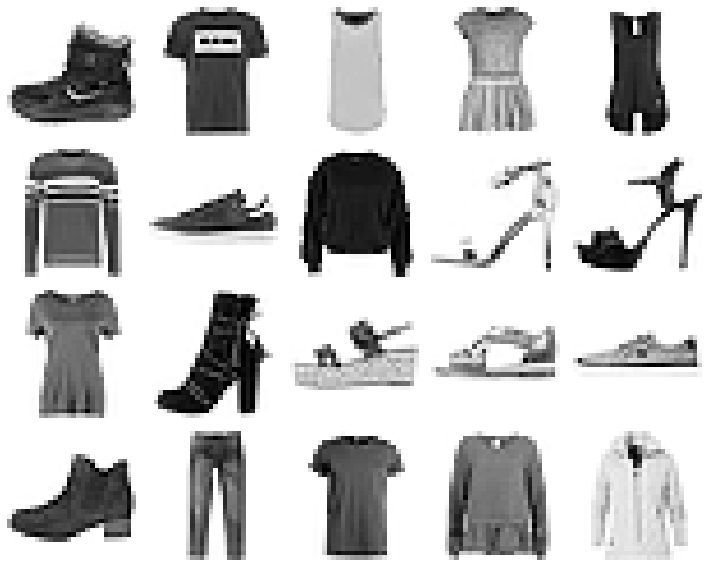

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(10,10))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:]
        ax = fig.add_subplot(5,5,i+1)
        ax.imshow(input_img[0,:,:])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,20, X_train)

Before we feed these images to the network, we do some transformations on the input data.

First we make the imge shape as 28 x 28 x 1 i.e. adding a depth of 1 as the input image as seen above has only grayscale channel. Also, the input data is normalized in range of 0 to 1 and made of type float.


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [4]:
print('Training: ',X_train.shape)
print('Test: ',X_test.shape)

Training:  (60000, 28, 28, 1)
Test:  (10000, 28, 28, 1)


Now for the class labels, we have a number representing it. Binary class matrix is created for the labels

In [0]:
from keras.utils import np_utils

num_classes = 10

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [6]:
print('Training: ',Y_train.shape)
print('Test: ',Y_test.shape)

Training:  (60000, 10)
Test:  (10000, 10)


Below is the network architecture for CNN.

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D

model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

We can see the summary of the model:

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, finally the model can be run. Here epochs and batch size is configurable.

In [10]:
epochs = 10
batch_size = 32

model.fit(X_train, Y_train, 
          batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.6296 - acc: 0.7750
Epoch 2/10
 2720/60000 [>.............................] - ETA: 56s - loss: 0.4244 - acc: 0.8537

60000/60000 [==============================] - 59s 991us/step - loss: 0.3982 - acc: 0.8572
Epoch 3/10
 7872/60000 [==>...........................] - ETA: 51s - loss: 0.3704 - acc: 0.8674

60000/60000 [==============================] - 58s 974us/step - loss: 0.3531 - acc: 0.8742
Epoch 4/10
10592/60000 [====>.........................] - ETA: 47s - loss: 0.3283 - acc: 0.8849

60000/60000 [==============================] - 58s 965us/step - loss: 0.3220 - acc: 0.8861
Epoch 5/10
11520/60000 [====>.........................] - ETA: 50s - loss: 0.3089 - acc: 0.8887

60000/60000 [==============================] - 60s 993us/step - loss: 0.3006 - acc: 0.8921
Epoch 6/10
12128/60000 [=====>........................] - ETA: 46s - loss: 0.2831 - acc: 0.8948

60000/60000 [==============================] - 68s 1ms/step - loss: 0.2842 - acc: 0.8983
Epoch 7/10
 9056/60000 [===>..........................] - ETA: 53s - loss: 0.2790 - acc: 0.8974

60000/60000 [==============================] - 64s 1ms/step - loss: 0.2746 - acc: 0.9012
Epoch 8/10
 9888/60000 [===>..........................] - ETA: 48s - loss: 0.2570 - acc: 0.9069

60000/60000 [==============================] - 59s 988us/step - loss: 0.2615 - acc: 0.9056
Epoch 9/10
10432/60000 [====>.........................] - ETA: 55s - loss: 0.2564 - acc: 0.9065

60000/60000 [==============================] - 67s 1ms/step - loss: 0.2540 - acc: 0.9088
Epoch 10/10
 7232/60000 [==>...........................] - ETA: 1:17 - loss: 0.2394 - acc: 0.9136

60000/60000 [==============================] - 80s 1ms/step - loss: 0.2492 - acc: 0.9104


Once, the network is trained, lets see how it performs with test dataset.

In [11]:
score = model.evaluate(X_test, Y_test)
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

10000/10000 [==============================] - 3s 308us/step
Evaluation loss:  0.23060567027926446
Evaluation accuracy:  0.9158
